<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-stuff" data-toc-modified-id="load-stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load stuff</a></span></li><li><span><a href="#TOF-Data" data-toc-modified-id="TOF-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>TOF-Data</a></span><ul class="toc-item"><li><span><a href="#Resolution" data-toc-modified-id="Resolution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Resolution</a></span></li><li><span><a href="#5-K" data-toc-modified-id="5-K-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>5 K</a></span></li><li><span><a href="#50-K" data-toc-modified-id="50-K-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>50 K</a></span></li><li><span><a href="#300-K" data-toc-modified-id="300-K-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>300 K</a></span></li></ul></li><li><span><a href="#Calc-shifted-datatsets" data-toc-modified-id="Calc-shifted-datatsets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calc shifted datatsets</a></span></li><li><span><a href="#Calc-contrast" data-toc-modified-id="Calc-contrast-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calc contrast</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Sanity-checks" data-toc-modified-id="Sanity-checks-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sanity checks</a></span></li></ul></div>

# load stuff

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from mieze_analysis import mieze
from mieze_analysis import masks
from mieze_analysis import plot
from mieze_analysis import functions
from mieze_analysis.functions import get_color
import mieze_analysis.load_functions as loadfct

from mieze_analysis.SANS_load import data_preparation
from mieze_analysis.SANS_load import create_filesarray
import mieze_analysis.SANS_load

%matplotlib inline

# TOF-Data

In [2]:
with open('data/HTO_II/00120972.tof','rb') as f:
    for i, line in enumerate(f):
        if i > 2:
            print line

### NICOS Device snapshot V2.0

### Experiment information

         Exp_localcontact : cfranz@frm2.tum.de

             Exp_proposal : p13582

               Exp_remark : Symmetriescans bei 12A über Nacht ohne Probe im direkten Strahl

                Exp_title : HTO Powder CF

                Exp_users : Andreas Wendl <andreas.wendl@frm2.tum.de> (Lehrstuhl E21, Physik Department, Technische Universität München), Steffen Säubert, Forschungs-Neutronenquelle Heinz-Maier Leibnitz (FRM II), Physik-Department, Technische Universität München, Prabhakaran Dharmalingam Clarendon Laboratory, University of Oxford, Andrew Boothroyd Clarendon Laboratory, University of Oxford, Christian Pfleiderer, Physik-Department, Technische Universität München

### Sample and alignment

        Sample_samplename : Holmium-Titanat / Ho2Ti2O7

### Instrument setup

                  T_alias : T_ccr_tube

                 Ts_alias : T_ccr_stick

          echotime_target : 1.99128 ns

               reseda_doi : 

In [3]:
#Übersicht über die Daten:
datalist = ['data/HTO_II/00120954','data/HTO_II/00120955','data/HTO_II/00120956',
            'data/HTO_II/00120585','data/HTO_II/00120586','data/HTO_II/00120587',
            'data/HTO_II/00120957','data/HTO_II/00120958','data/HTO_II/00120959',
            'data/HTO_II/00120960','data/HTO_II/00120961','data/HTO_II/00120962',
            'data/HTO_II/00120963','data/HTO_II/00120964','data/HTO_II/00120965']
for filepath in datalist:
    with open(filepath+'.tof','rb') as f:
        print filepath
        for i, line in enumerate(f):
            if i > 0:
                if line[:27] == '          echotime_target :':
                    print line
                if line[:27] == '      T_ccr_tube_setpoint :':
                    print line


data/HTO_II/00120954
          echotime_target : 0.105546 ns

      T_ccr_tube_setpoint : 5.0

data/HTO_II/00120955
          echotime_target : 0.105546 ns

      T_ccr_tube_setpoint : 50.0

data/HTO_II/00120956
          echotime_target : 0.105546 ns

      T_ccr_tube_setpoint : 300.0

data/HTO_II/00120585
          echotime_target : 0.119063 ns

      T_ccr_tube_setpoint : 300.0

data/HTO_II/00120586
          echotime_target : 0.119063 ns

      T_ccr_tube_setpoint : 5.0

data/HTO_II/00120587
          echotime_target : 0.119063 ns

      T_ccr_tube_setpoint : 5.0

data/HTO_II/00120957
          echotime_target : 1.99128 ns

      T_ccr_tube_setpoint : 300.0

data/HTO_II/00120958
          echotime_target : 1.99128 ns

      T_ccr_tube_setpoint : 50.0

data/HTO_II/00120959
          echotime_target : 1.99128 ns

      T_ccr_tube_setpoint : 5.0

data/HTO_II/00120960
          echotime_target : 1.35383 ns

      T_ccr_tube_setpoint : 5.0

data/HTO_II/00120961
          echotime_target

## Resolution

In [4]:
datalist = ['data/HTO_II/00120970','data/HTO_II/00120971','data/HTO_II/00120972']
print len(datalist)
reso = mieze()
reso.load_tofs(datalist, 8)
reso.wavelength = np.around(reso.wavelength, decimals =0)
print reso.calc_setime()
reso.monitor = np.ones(len(datalist))
print reso.freqs
print reso.wavelength
print reso.lsd
reso.calc_contrast_single_foil(foil=7,mask=np.ones([128,128]))

datalist = ['data/HTO_II/00120970','data/HTO_II/00120971','data/HTO_II/00120972']
print len(datalist)
reso2 = mieze()
reso2.load_tofs(datalist, 8)
reso2.wavelength = np.around(reso.wavelength, decimals =0)
print reso2.calc_setime()
reso2.monitor = np.ones(len(datalist))
print reso2.freqs
print reso2.wavelength
print reso2.lsd
reso2.calc_contrast_single_foil(foil=7,mask=np.ones([128,128]))

3
[0.10470186 1.34244379 1.97534143]
[[ 35000.  39781.]
 [161700. 223000.]
 [237800. 328000.]]
8.0
3.347
no background file given
3
[0.10470186 1.34244379 1.97534143]
[[ 35000.  39781.]
 [161700. 223000.]
 [237800. 328000.]]
8.0
3.347
no background file given


C:\Users\wendl\Anaconda2\lib\site-packages\mieze_analysis-v0.2.3_1_g6743-py2.7.egg\mieze_analysis\mieze.py:64: RuntimeWarning: underflow encountered in exp
  func = lambda y: y**(N_dof/2 - 1) * np.exp(-y)


(array([0.78925258, 0.45390297, 0.16615038]),
 array([0.02359204, 0.00449869, 0.00440331]))

## 5 K

In [8]:
datalist = ['data/HTO_II/00120954', 'data/HTO_II/00120960', 'data/HTO_II/00120959']
print len(datalist)
T5K = mieze()
T5K.load_tofs(datalist, 8)
T5K.wavelength = np.around(T5K.wavelength, decimals =0)
print T5K.calc_setime()
T5K.monitor = np.ones(len(datalist))
print T5K.freqs
print T5K.wavelength
print T5K.lsd
T5K.calc_contrast_single_foil(foil=7,mask=np.ones([128,128]))

3
[0.10470186 1.34244379 1.97534143]
[[ 35000.  39781.]
 [161700. 223000.]
 [237800. 328000.]]
8.0
3.347
no background file given


(array([0.65701107, 0.34523497, 0.07092773]),
 array([0.03434987, 0.0169522 , 0.03331967]))

no background file given
no background file given


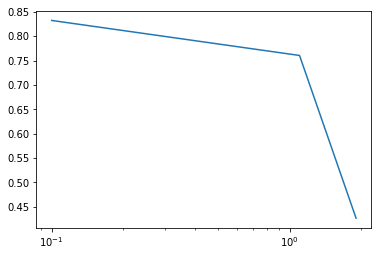

In [7]:
plt.plot([0.1,1.1,1.9],T5K.calc_contrast_single_foil(foil=7,mask=np.ones([128,128]))[0]/reso.calc_contrast_single_foil(foil=7,mask=np.ones([128,128]))[0])
plt.xscale('log')

## 50 K

In [9]:
datalist = ['data/HTO_II/00120955', 'data/HTO_II/00120961', 'data/HTO_II/00120964']
print len(datalist)
T50K = mieze()
T50K.load_tofs(datalist, 8)
T50K.wavelength = np.around(T50K.wavelength, decimals =0)
print T50K.calc_setime()
T50K.monitor = np.ones(len(datalist))
print T50K.freqs
print T50K.wavelength
print T50K.lsd
T50K.calc_contrast_single_foil(foil=7,mask=np.ones([128,128]))

3
[0.10470186 1.34244379 1.97534143]
[[ 35000.  39781.]
 [161700. 223000.]
 [237800. 328000.]]
8.0
3.347
no background file given


(array([0.66641901, 0.24960081, 0.03376802]),
 array([0.03795987, 0.01843495, 0.01893852]))

## 300 K

In [10]:
datalist = ['data/HTO_II/00120956', 'data/HTO_II/00120962', 'data/HTO_II/00120963']
print len(datalist)
T300K = mieze()
T300K.load_tofs(datalist, 8)
T300K.wavelength = np.around(T300K.wavelength, decimals =0)
print T300K.calc_setime()
T300K.monitor = np.ones(len(datalist))
print T300K.freqs
print T300K.wavelength
print T300K.lsd
T300K.calc_contrast_single_foil(foil=7,mask=np.ones([128,128]))

3
[0.10470186 1.34244379 1.97534143]
[[ 35000.  39781.]
 [161700. 223000.]
 [237800. 328000.]]
8.0
3.347
no background file given


(array([0.12326092, 0.08707493, 0.04793968]),
 array([0.03576974, 0.0171586 , 0.0186649 ]))

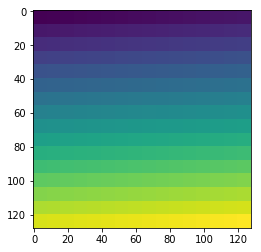

In [11]:
pre_mask = masks.gen_pregroup_mask(8, shape=(128,128))
plt.imshow(pre_mask)

In [12]:
phase = reso.extract_phase(premask=pre_mask,selectedfoils=[0,0,0,0,0,0,0,1])

Evaluate phase shift through resolution measurement with premask
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on fo

C:\Users\wendl\Anaconda2\lib\site-packages\mieze_analysis-v0.2.3_1_g6743-py2.7.egg\mieze_analysis\mieze.py:77: RuntimeWarning: divide by zero encountered in double_scalars
  return sum((((ampl*np.cos(freq*t+phase)+offset-c)**2)/e**2 for c,t,e in zip(counts,time,count_error)))
C:\Users\wendl\Anaconda2\lib\site-packages\mieze_analysis-v0.2.3_1_g6743-py2.7.egg\mieze_analysis\mieze.py:77: RuntimeWarning: invalid value encountered in double_scalars
  return sum((((ampl*np.cos(freq*t+phase)+offset-c)**2)/e**2 for c,t,e in zip(counts,time,count_error)))
C:\Users\wendl\Anaconda2\lib\site-packages\mieze_analysis-v0.2.3_1_g6743-py2.7.egg\mieze_analysis\mieze.py:64: RuntimeWarning: invalid value encountered in double_scalars
  func = lambda y: y**(N_dof/2 - 1) * np.exp(-y)
C:\Users\wendl\Anaconda2\lib\site-packages\mieze_analysis-v0.2.3_1_g6743-py2.7.egg\mieze_analysis\mieze.py:65: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from bei

Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (1

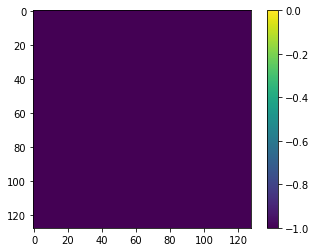

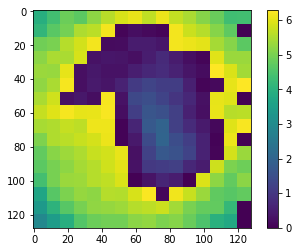

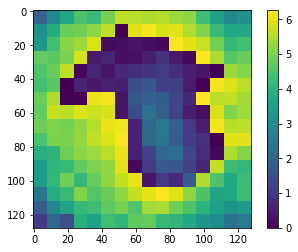

In [13]:
plt.imshow(phase[0,0], interpolation='nearest', vmin= 0)
plt.colorbar()
plt.show()
plt.imshow(phase[1,0], interpolation='nearest', vmin= 0)
plt.colorbar()
plt.show()
plt.imshow(phase[2,0], interpolation='nearest', vmin= 0)
plt.colorbar()
plt.show()

# Calc shifted datatsets

In [14]:
reso.calc_shifted(reso, pre_mask, [0,0,0,0,0,0,0,1])

Evaluate phase shift through resolution measurement with premask
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on fo

In [15]:
T5K.calc_shifted(reso, pre_mask, [0,0,0,0,0,0,0,1])

Evaluate phase shift through resolution measurement with premask
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on fo

In [16]:
T50K.calc_shifted(reso, pre_mask, [0,0,0,0,0,0,0,1])

Evaluate phase shift through resolution measurement with premask
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on fo

In [19]:
T300K.calc_shifted(reso, pre_mask, [0,0,0,0,0,0,0,1])

Evaluate phase shift through resolution measurement with premask
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 7
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on fo

# Calc contrast

In [20]:
#reso2.extract_phase(premask=pre_mask,selectedfoils=[0,0,0,0,0,0,0,1])

reso2.reshaped = reso.shifted


In [21]:
phase2 = reso2.extract_phase(premask=pre_mask,selectedfoils=[1])

Evaluate phase shift through resolution measurement with premask
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed in echo 0 on foil 0
Fit failed: Covariance not valid.
covariance failed AGAIN (15 instead of 16 points were fitted) in echo 0 on fo

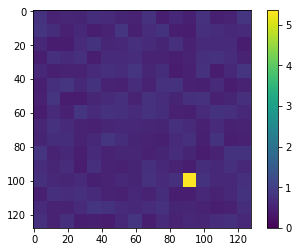

In [22]:
plt.imshow(phase2[2,0], interpolation='nearest', vmin= 0)
plt.colorbar()
plt.show()

In [23]:
Creso = np.abs(reso.calc_contrast_all_foils_shifted(mask=np.ones([128,128]),foilsinechos=[[1],[1],[1]], savename = 'Contrast'))

no background file given


In [24]:
C5K = np.abs(T5K.calc_contrast_all_foils_shifted(mask=np.ones([128,128]),foilsinechos=[[1],[1],[1]], savename = 'Contrast'))

no background file given


In [25]:
C50K = np.abs(T50K.calc_contrast_all_foils_shifted(mask=np.ones([128,128]),foilsinechos=[[1],[1],[1]], savename = 'Contrast'))

no background file given


In [26]:
C300K = np.abs(T300K.calc_contrast_all_foils_shifted(mask=np.ones([128,128]),foilsinechos=[[1],[1],[1]], savename = 'Contrast'))

no background file given


In [27]:
C5K[0]/Creso[0]

array([0.83251098, 0.76997879, 0.67155235])

# Plots

In [28]:
setime = reso.echos['setimes']
print setime,Creso[0],Creso[1]

[0.10470186 1.34244379 1.97534143] [0.78920697 0.69094876 0.42361709] [0.02359143 0.0046154  0.00446876]


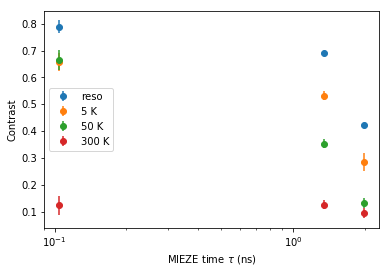

In [29]:
plt.errorbar(setime,Creso[0],Creso[1], fmt = 'o', label = 'reso')
plt.errorbar(setime,C5K[0],C5K[1], fmt = 'o', label = '5 K')
plt.errorbar(setime,C50K[0],C50K[1], fmt = 'o', label = '50 K')
plt.errorbar(setime,C300K[0],C300K[1], fmt = 'o', label = '300 K')
plt.xscale('log')
plt.legend()
plt.ylabel(r'Contrast')
plt.xlabel(r'MIEZE time $\tau$ (ns)')
plt.savefig('Bilder/HTO_Contrast_8x8_premask.pdf')

In [40]:
export_reso = np.array([setime,Creso[0],Creso[1]]).transpose()
np.savetxt("data/reso.txt",export_reso,  header = "Mieze time; Contrast; Contrast Error; tof-filenumbers: 00120970, 00120971, 00120972")
export_5K = np.array([setime,C5K[0],C5K[1]]).transpose()
np.savetxt("data/5K.txt",export_5K,  header = "Mieze time; Contrast; Contrast Error; tof-filenumbers: 00120954, 00120960, 00120959")
export_50K = np.array([setime,C50K[0],C50K[1]]).transpose()
np.savetxt("data/50K.txt",export_50K,  header = "Mieze time; Contrast; Contrast Error; tof-filenumbers: 00120955, 00120961, 00120964")
export_300K = np.array([setime,C300K[0],C300K[1]]).transpose()
np.savetxt("data/300K.txt",export_300K,  header = "Mieze time; Contrast; Contrast Error; tof-filenumbers: 00120956, 00120962, 00120963")

In [ ]:
def fit_fRumny_fix(x, y, init=[5,600,700,1,1,1,1500,4500], fix = (False,False,False,False,False,False,False,False)):
    fitfunc = lambda p, x: ((p[3] if not fix[3] else init[3])*np.exp(-0.5*(p[0] if not fix[0] else init[0])*x/0.65)+(p[4] if not fix[4] else init[4])*np.cos((p[6] if not fix[6] else init[6])*x/0.65)*np.exp(-0.5*(p[1] if not fix[1] else init[1])*x/0.65)+(p[5] if not fix[5] else init[5])*np.cos((p[7] if not fix[7] else init[7])*x/0.65)*np.exp(-0.5*(p[2] if not fix[2] else init[2])*x/0.65))/((p[3] if not fix[3] else init[3])+(p[4] if not fix[4] else init[4])+(p[5] if not fix[5] else init[5]))
    errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
    final, p_cov, infodict,errmsg, success = leastsq(errfunc, init[:], args=(x, y), full_output=1)
    return fitfunc, final, p_cov #final = [y0,y1,gamma]

def double_exp(t,gamma1 = 1,gamma2 = 1000,A2=0):
    return ((1-A2)*np.exp(-0.5*gamma1/0.658 * t) + A2*np.exp(-0.5*gamma2/0.658 * t))

def fit_double_exp(setimes,contrast,contrast_error,guess):
    p0 = guess
    bounds = ((0,0,0),(np.inf,np.inf,1))
    fit_exp, fit_cov = op.curve_fit(double_exp, setimes, contrast, p0, absolute_sigma = True, sigma = contrast_error,bounds= bounds)#,maxfev = 1000) #, 
    return fit_exp, np.sqrt(np.diag(fit_cov)), fit_cov#, bounds

def CF(tau,gamma1,gamma2,A2,E2 = 1500):
    return ((1-A2)*np.exp(-0.5*gamma1*tau/0.65)+A2*np.cos(E2*tau/0.65)*np.exp(-0.5*gamma2*tau/0.65))

def fit_CF(setimes,contrast,contrast_error,guess):
    p0 = guess
    bounds = ((0,0,0,0),(1e5,1e5,1,1e5))
    fit_exp, fit_cov = op.curve_fit(CF, setimes, contrast, p0, absolute_sigma = True, sigma = contrast_error,bounds= bounds)#,maxfev = 1000) #, 
    return fit_exp, np.sqrt(np.diag(fit_cov)), fit_cov#, bounds

In [ ]:
tau = np.logspace(-1,2,1000)
A2 = 1
gamma1 = 1
gamma2 = 0.5
E = 0
plt.plot(tau,np.abs(CF(tau,gamma1,gamma2,A2,E)),label = '$\Gamma_2 = $ %.4f $\mathsf{\mu eV}$; $E = $%.2f $\mathsf{\mu eV}$' %(gamma2, E))
gamma2 = 0.1
plt.plot(tau,np.abs(CF(tau,gamma1,gamma2,A2,E)),label = '$\Gamma_2 = $ %.4f $\mathsf{\mu eV}$; $E = $%.2f $\mathsf{\mu eV}$' %(gamma2, E))

plt.xscale('log')
#plt.legend()
plt.ylabel(r'$S(Q,\tau)/S(Q,0)$')
plt.xlabel(r'MIEZE time $\tau$ (ns)')

plt.errorbar(setime,C5K[0]/Creso[0],C5K[1], fmt = 'o')
plt.errorbar(setime,C50K[0]/Creso[0],C50K[1], fmt = 'o')
plt.errorbar(setime,C300K[0]/Creso[0],C300K[1], fmt = 'o')

In [ ]:
import pickle
with open('DataHTO8AA.pickle', 'wb') as handle:
    pickle.dump(np.array([setime,Creso,C5K,C50K,C300K]), handle, protocol=pickle.HIGHEST_PROTOCOL)

# Sanity checks

In [ ]:
reso.compare_shifted_foils_in_mask(mask=np.ones([128,128]), show_fit= 'true')

In [ ]:
T5K.compare_shifted_foils_in_mask(mask=np.ones([128,128]), show_fit= 'true')

In [ ]:
T50K.compare_shifted_foils_in_mask(mask=np.ones([128,128]), show_fit= 'true')

In [ ]:
T300K.compare_shifted_foils_in_mask(mask=np.ones([128,128]), show_fit= 'true')